# xtrame gradient boosting 

In [ ]:
#installing xgboost using ancoanda promt
# conda install -c anaconda py-xgboost

In [1]:
#install xgboost using jyputer
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
ds=pd.read_csv("Downloads\mushrooms.csv")
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:xlabel='class', ylabel='count'>

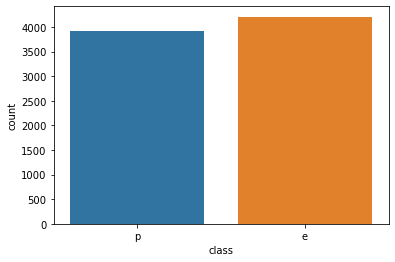

In [5]:
#Eda
sns.countplot(x="class",data=ds)

In [6]:
ds.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
ds.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
#xnad y 
x=pd.get_dummies(ds.drop("class",axis=1),drop_first=True)
y=pd.get_dummies(ds["class"],drop_first=True)

In [9]:
x.shape,y.shape

((8124, 95), (8124, 1))

In [10]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [11]:
#modeling xgboost with defult 
from xgboost import XGBClassifier





In [12]:
help(XGBClassifier)


Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learnin

In [13]:
#1st model should be with defult param 
xgb_model= XGBClassifier()


In [14]:
#fit the model with training data set 
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [15]:
#predict over x_train & predict over x_test
train_pred=xgb_model.predict(x_train)
test_pred=xgb_model.predict(x_test)

In [16]:
#evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

1.0
1.0


In [17]:
#appling k_fold croass validation 
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator= xgb_model, x=x, y=y, cv=5)
accuracy.mean()

TypeError: cross_val_score() got an unexpected keyword argument 'x'

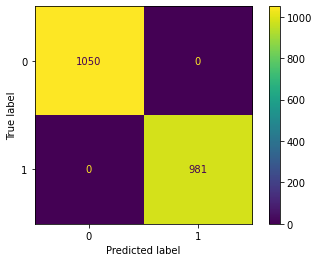

In [18]:
#confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model,x_test,y_test)
plt.show()

In [19]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [20]:
#hyerpamater tunning 
from sklearn.model_selection import GridSearchCV
xgb_model= XGBClassifier()
param_grid={"n_estimators":[1,5,66,7,2,100],"max_depth":[3,4,5,6],"gamma":[0,1,2,4]}

In [ ]:
grid=GridSearchCV(xbg_model,param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)

grid.best_params_

In [ ]:
prediction=grid.predict(x_test)

In [ ]:
print(classification_report(y_test,test_pred))

In [ ]:
#feature importances
grid.best_estimator_.feature_importances_

In [ ]:
imp_f=pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_)
imp_f

In [ ]:
imp_f.sort_values("Importances",ascending=False)

In [ ]:
imp_f.describe()

In [ ]:
imp_f=imp_f[imp_f["Importances"]>0.000527]

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_f.sort_values("Importance"),x=imp_f.index,y="Importances")
plt.xticks(rotation=90)